[source](https://cs231n.github.io/neural-networks-case-study/)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

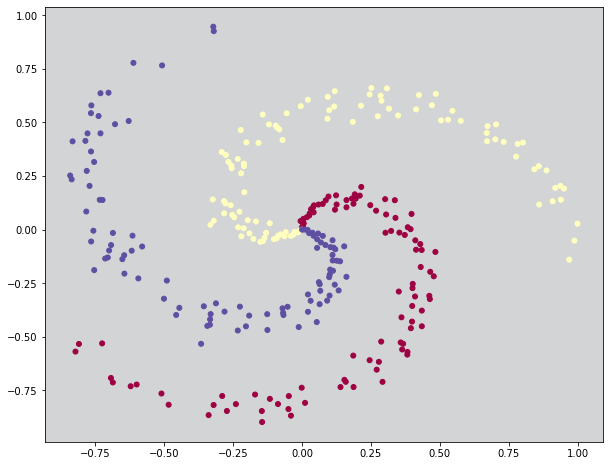

In [51]:
# Generating a spiral dataset 
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# Change background color and increase figsize
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot()
ax.set_facecolor('#d2d4d6')

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap=plt.cm.Spectral)
plt.show()

In [59]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K) # randn gives normally distributed matrix
b = np.zeros((1,K))
W

array([[ 0.00701419,  0.00158961,  0.00546158],
       [ 0.01469639,  0.01447236, -0.00827346]])

In [58]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b
scores.shape

(300, 3)

In [60]:
# Comute probabilities
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [61]:
correct_logprobs = -np.log(probs[range(num_examples),y])